# Imports

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

# Question 1

This task asks us to illustrate the given set in
an Edgeworth box. Thus, we have illustrated the set of allocations (combinations of x1 and x2) that are Pareto improvements over the initial endowments of two consumers, A and B, in an exchange economy. We utilized the given utility functions for both consumers and iterated them over a grid of possible allocations to determine which ones would make both consumers at least as well off as they were with their initial endowments.

The plot illustrates the initial endowments as a black square and the blue dots represent the allocations that are Pareto improvements. The blue area displays all the allocations where both consumers are better off compared to their intital endowments: Neither can be made better off without making the other worse off.

The blue regions reflect the potential gains from trade. Any trade resulting in an allocation within this area is beneficial for both parties. Thus, we are given the core concept of exchange economies where it is possible to reach more efficient and mutually beneficial outcomes through trade.


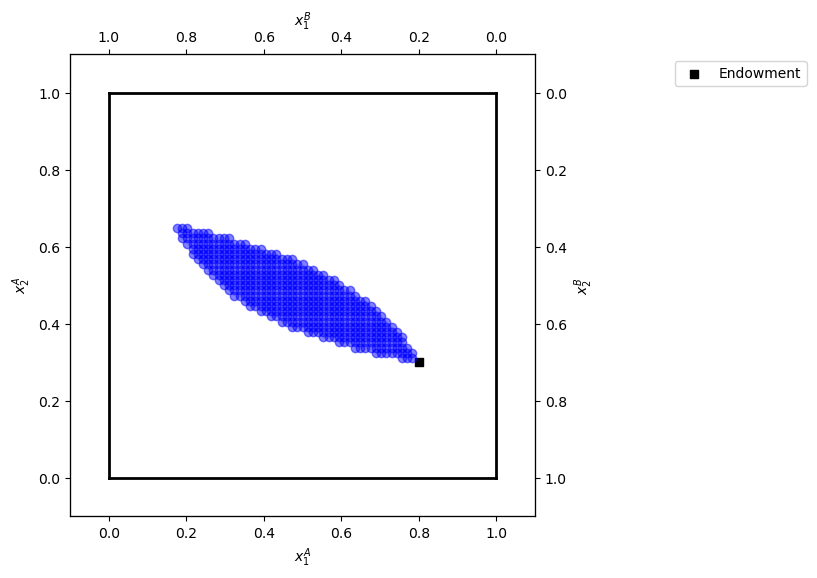

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and initial endowments
alpha = 1/3
beta = 1/3
w1A = 0.8
w2A = 0.3
w1B = 1 - w1A
w2B = 1 - w2A

# Utility functions
def utility_A(x1, x2, alpha=alpha):
    return (x1**alpha) * (x2**(1-alpha))

def utility_B(x1, x2, beta=beta):
    return (x1**beta) * (x2**(1-beta))

# Initial utility with given endowments
initial_utility_A = utility_A(w1A, w2A)
initial_utility_B = utility_B(w1B, w2B)

# Figure setup from provided code snippet
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plot endowment point
ax_A.scatter(w1A, w2A, marker='s', color='black', label='Endowment')

# Limits
w1bar = 1.0
w2bar = 1.0
ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Set limits for axes
ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Plot the Pareto improvement area
N = 75
x1_range = np.linspace(0, w1bar, N)
x2_range = np.linspace(0, w2bar, N)
X1, X2 = np.meshgrid(x1_range, x2_range)
pareto_improvements = []

# Combination for Pareto improvement
for x1 in x1_range:
    for x2 in x2_range:
        # Consumer A's remaining endowment
        w1A_remaining = w1bar - x1
        w2A_remaining = w2bar - x2
        
        # Corresponding consumption for B
        x1B = w1bar - x1
        x2B = w2bar - x2

        # Calculate utilities for the current allocation
        current_utility_A = utility_A(x1, x2)
        current_utility_B = utility_B(x1B, x2B)

        # Check if both utilities are at least as large as the initial utilities
        if current_utility_A >= initial_utility_A and current_utility_B >= initial_utility_B:
            pareto_improvements.append((x1, x2))

# x1 and x2 coordinates for Pareto improvements
pareto_x1, pareto_x2 = zip(*pareto_improvements)

# Plot the Pareto improvement area on the Edgeworth box
ax_A.scatter(pareto_x1, pareto_x2, alpha=0.5, label='Pareto improvements', color='blue')

plt.show()



# Question 2

Text

# Question 3

We are asked to determine the market clearing price. We simulated the given exchange economy to find the market clearing price for good 1, which is approximately 0.9444. This was achieved by iteratively adjusting the price until the aggregate demand from both consumers equaled the total endowment. The result reflects an equilibrium state in the economy, where the market is perfectly efficient with no excess supply or demand.

In [4]:
from ExchangeEconomy import ExchangeEconomyClass

alpha = 1/3
beta = 2/3
endowment_A = [0.8, 0.3]

economy = ExchangeEconomyClass(alpha, beta, endowment_A)

# Market clearing price
p1_clearing = economy.market_clearing_price()
print(f'Market clearing price (p1): {p1_clearing:.3f}')

Market clearing price (p1): 0.944


# Question 4

Consumer A seeks the price that maximizes her utility, given the set of possible (positive) prices.

In question 4a, where only a set of predefined prices are considered, the optimal price for good 1 is 1.500, resulting in the allocation of [0.333,1.000] for consumer A and [0.444,0.333] for consumer B.

In question 4b, where consumer A can choose any positive price, the optimal price jumps to 10.000, with consumer A receiving a much larger quantity of good 2 
[0.277,5.533], whereas consumer B's allocation is 
[0.180,0.900].

This demonstrates that allowing consumer A to choose from any positive price leads to an extreme allocation in her favor, reflecting the impact of price flexibility on resource distribution in a market.

In [8]:
# Question 4a
P1 = [0.5, 1.5] # Assuming a set of prices
p1_optimal_4a, allocation_A_4a, allocation_B_4a = economy.allocation_prices_in_P1(P1)
print(f'Optimal price and allocation in P1: {p1_optimal_4a:.3f}, '
      f'[{allocation_A_4a[0]:.3f}, {allocation_A_4a[1]:.3f}], '
      f'[{allocation_B_4a[0]:.3f}, {allocation_B_4a[1]:.3f}]')

Optimal price and allocation in P1: 1.500, [0.333, 1.000], [0.444, 0.333]


In [9]:
# Question 4b
p1_optimal_4b, allocation_A_4b, allocation_B_4b = economy.allocation_any_positive_price()
print(f'Optimal price and allocation for any positive price: {p1_optimal_4b:.3f}, '
      f'[{allocation_A_4b[0]:.3f}, {allocation_A_4b[1]:.3f}], '
      f'[{allocation_B_4b[0]:.3f}, {allocation_B_4b[1]:.3f}]')

Optimal price and allocation for any positive price: 10.000, [0.277, 5.533], [0.180, 0.900]


# Question 5

Text

# Question 6

Text

# Question 7

Text

# Question 8

Text